# Review questions
Here we analyse some of the relationships used in our Lagrangian model.

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.lines import Line2D
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import cmocean

In [2]:
datadir = '/Users/rfische1/Documents/UU/'
         #'/data/oceanparcels/output_data/data_Delphine/' 
         #'/nethome/lobel001/biofouling_3dtransport_2/Simulation/Sim_output/' 
         #/data/oceanparcels/output_data/data_Reint/'

## Respiration - temperature dependence

In [2]:
T = np.linspace(0, 30)
q10 = 2
r20 = 0.1 / 86400.

Aresp = (q10 ** ((T - 20.) / 10.)) * r20

In [371]:
regions = {'EqPac': 'Equatorial Pacific',
           'GPGP': 'Great Pacific Garbage Patch',
           'SO': 'Southern Ocean',
           'NPSG': 'North Pacific Subtropical Gyre'}
region = ['EqPac','NPSG', 'SO']
region_cmap = ['teal', 'darkorange', '#9AE19D']
r_pl_clist = ['#7a0177','#c51b8a','#f768a1', '#fbb4b9']
r_pl_cmap = plt.get_cmap('RdPu_r')

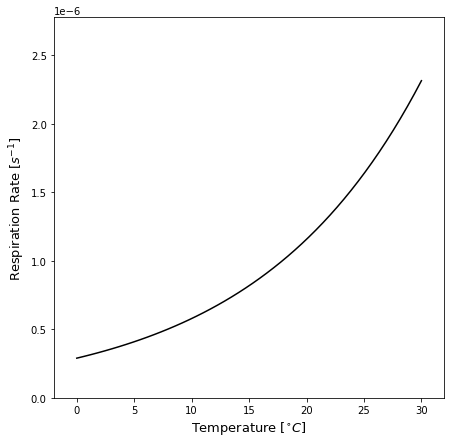

In [6]:
fig = plt.figure(figsize=(7,7))
ax = plt.axes()
ax.plot(T,Aresp, color='k')
ax.set_xlabel(r'Temperature [$^{\circ}C$]', fontsize=13)
ax.set_ylabel('Respiration Rate [$s^{-1}$]', fontsize=13)
ax.set_ylim(0,np.max(Aresp)*1.2)
ax.set_xlim(-2, 32)

### RANGES ###
# ax.vlines([25,30],[0,0],[Aresp[np.abs(T-25).argmin()],Aresp[np.abs(T-30).argmin()]], colors=region_cmap[0], label=regions[region[0]])
# ax.fill_between(T[np.abs(T-25).argmin():np.abs(T-30).argmin()+1],Aresp[np.abs(T-25).argmin():np.abs(T-30).argmin()+1], color=region_cmap[0], alpha=0.3)
# ax.hlines([Aresp[np.abs(T-25).argmin()],Aresp[np.abs(T-30).argmin()]], [-3, -3], [25,30], colors=region_cmap[0])
# ax.fill_betweenx(Aresp[np.abs(T-25).argmin():np.abs(T-30).argmin()+1], T[np.abs(T-25).argmin():np.abs(T-30).argmin()+1], np.ones(T[np.abs(T-25).argmin():np.abs(T-30).argmin()+1].shape)*-3, color=region_cmap[0], alpha=0.3)

# ax.vlines([12,22],[0,0],[Aresp[np.abs(T-12).argmin()],Aresp[np.abs(T-22).argmin()]], colors=region_cmap[1], label=regions[region[1]])
# ax.fill_between(T[np.abs(T-12).argmin():np.abs(T-22).argmin()+1],Aresp[np.abs(T-12).argmin():np.abs(T-22).argmin()+1], color=region_cmap[1], alpha=0.3)
# ax.hlines([Aresp[np.abs(T-12).argmin()],Aresp[np.abs(T-22).argmin()]], [-3, -3], [12,22], colors=region_cmap[1])
# ax.fill_betweenx(Aresp[np.abs(T-12).argmin():np.abs(T-22).argmin()+1], T[np.abs(T-12).argmin():np.abs(T-22).argmin()+1], np.ones(T[np.abs(T-12).argmin():np.abs(T-22).argmin()+1].shape)*-3, color=region_cmap[1], alpha=0.3)

# ax.vlines([0,8],[0,0],[Aresp[np.abs(T-0).argmin()],Aresp[np.abs(T-8).argmin()]], colors=region_cmap[2], label=regions[region[2]])
# ax.fill_between(T[np.abs(T-0).argmin():np.abs(T-8).argmin()+1],Aresp[np.abs(T-0).argmin():np.abs(T-8).argmin()+1], color=region_cmap[2], alpha=0.3)
# ax.hlines([Aresp[np.abs(T-0).argmin()],Aresp[np.abs(T-8).argmin()]], [-3, -3], [0,8], colors=region_cmap[2])
# ax.fill_betweenx(Aresp[np.abs(T-0).argmin():np.abs(T-8).argmin()+1], T[np.abs(T-0).argmin():np.abs(T-8).argmin()+1], np.ones(T[np.abs(T-0).argmin():np.abs(T-8).argmin()+1].shape)*-3, color=region_cmap[2], alpha=0.3)

# ax.legend()
plt.savefig(datadir+'resprate_temp')

#### Respiration coefficient difference factor 2, 4 respectively

#### da/dt = - Aresp * a

#### a(t) = e^(-Aresp * t)

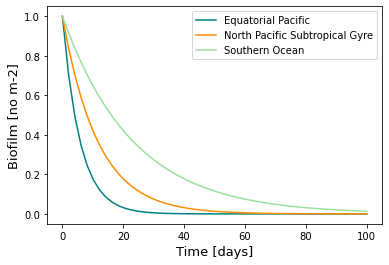

In [5]:
t= np.linspace(0,1e2)
A0 = 2e-6   # s-1
A1 = 1e-6   # s-1
A2 = 0.5e-6 # s-1
a0 = np.exp(-A0*86400*t)
a1 = np.exp(-A1*86400*t)
a2 = np.exp(-A2*86400*t)
plt.plot(t,a0, color=region_cmap[0], label=regions[region[0]])
plt.plot(t,a1, color=region_cmap[1], label=regions[region[1]])
plt.plot(t,a2, color=region_cmap[2], label=regions[region[2]])
plt.xlabel('Time [days]', fontsize=13)
plt.ylabel('Biofilm [no m-2]', fontsize=13)
plt.legend()

## Settling velocity - seawater density dependence

In [6]:
def vs_rhosw(r_tot, rho_tot, rho_sw, kin_visc):
    g=9.81
    
    dn=2. * (r_tot)
    delta_rho = (rho_tot - rho_sw) / rho_sw  # normalised difference in density between total plastic+bf and seawater[-]
    dstar = ((rho_tot - rho_sw) * g * dn ** 3.) / (rho_sw * kin_visc ** 2.)  # [-]

    w=np.zeros(dstar.shape)
    w[dstar > 5e9] = 1000.
    w[dstar < 0.05] = (dstar[dstar < 0.05] ** 2.) * 1.71E-4
    w[np.logical_and(dstar>0.05,dstar<5e9)] = 10. ** (-3.76715 
                                                   + (1.92944 * np.log10(dstar[np.logical_and(dstar>0.05,dstar<5e9)])) 
                                                      - (0.09815 * np.log10(dstar[np.logical_and(dstar>0.05,dstar<5e9)]) ** 2.) 
                                                      - (0.00575 * np.log10(dstar[np.logical_and(dstar>0.05,dstar<5e9)]) ** 3.)
                                                      + (0.00056 * np.log10(dstar[np.logical_and(dstar>0.05,dstar<5e9)]) ** 4.))
    # ------ Settling of particle -----
    vs = np.zeros(dstar.shape)
    vs[delta_rho > 0] = (g * kin_visc * w[delta_rho > 0] * delta_rho[delta_rho > 0]) ** (1. / 3.)
    a_del_rho = delta_rho * -1.
    vs[delta_rho<=0] = -1. * (g * kin_visc * w[delta_rho<=0] * a_del_rho[delta_rho<=0]) ** (1. / 3.)  # m s-1
    
    return vs

In [7]:
r_tot = [1e-5, 1e-4, 1e-3]
rho_tot = [920, 1040, 1170]
rho_sw = np.linspace(1020, 1026)
kin_visc=1e-6
vs_0 = vs_rhosw(r_tot=r_tot[0], rho_tot=920, rho_sw=rho_sw, kin_visc=kin_visc)
vs_1 = vs_rhosw(r_tot=r_tot[1], rho_tot=920, rho_sw=rho_sw, kin_visc=kin_visc)
vs_2 = vs_rhosw(r_tot=r_tot[2], rho_tot=920, rho_sw=rho_sw, kin_visc=kin_visc)
vs_3 = vs_rhosw(r_tot=r_tot[0], rho_tot=1040, rho_sw=rho_sw, kin_visc=kin_visc)
vs_4 = vs_rhosw(r_tot=r_tot[1], rho_tot=1040, rho_sw=rho_sw, kin_visc=kin_visc)
vs_5 = vs_rhosw(r_tot=r_tot[2], rho_tot=1040, rho_sw=rho_sw, kin_visc=kin_visc)
vs_6 = vs_rhosw(r_tot=r_tot[0], rho_tot=1170, rho_sw=rho_sw, kin_visc=kin_visc)
vs_7 = vs_rhosw(r_tot=r_tot[1], rho_tot=1170, rho_sw=rho_sw, kin_visc=kin_visc)
vs_8 = vs_rhosw(r_tot=r_tot[2], rho_tot=1170, rho_sw=rho_sw, kin_visc=kin_visc)
vslist = [[vs_0, vs_1, vs_2], [vs_3, vs_4, vs_5], [vs_6, vs_7, vs_8]]

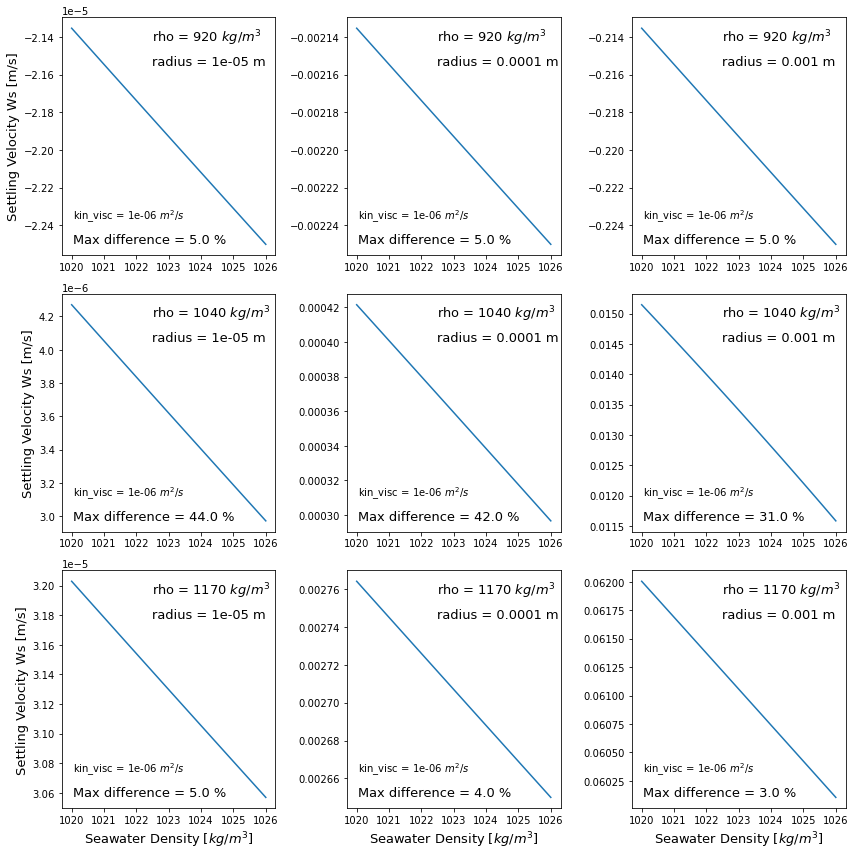

In [8]:
fig = plt.figure(figsize=(12,12), tight_layout=True)
gs = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[0, 2])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[1, 2])
ax6 = fig.add_subplot(gs[2, 0])
ax7 = fig.add_subplot(gs[2, 1])
ax8 = fig.add_subplot(gs[2, 2])

axes = [[ax0, ax1, ax2],[ax3, ax4, ax5],[ax6, ax7, ax8]]

for i, ax_r in enumerate(axes):
    for j, ax in enumerate(ax_r):
        ax.plot(rho_sw,vslist[i][j])
        if i == 2:
            ax.set_xlabel(r'Seawater Density [$kg/m^3$]', fontsize=13)
        if j == 0:
            ax.set_ylabel('Settling Velocity Ws [m/s]', fontsize=13)
        ax.text(0.42,0.8, f'radius = {r_tot[j]} m', fontsize=13,transform=ax.transAxes)
        ax.text(0.42,0.9, fr'rho = {rho_tot[i]} $kg/m^3$', fontsize=13,transform=ax.transAxes)
        ax.text(0.05,0.15, fr'kin_visc = {kin_visc} $m^2/s$',transform=ax.transAxes)
        ax.text(0.05,0.05, f'Max difference = {np.round((np.max(vslist[i][j])-np.min(vslist[i][j]))/np.abs(np.min(vslist[i][j]))*100)} %', fontsize=13,transform=ax.transAxes)

#### Time until sinking increases with increased sw density - max velocity change 44 %

#### Oscillating pattern more dependent on stratification than initial sw density

## Subsurface maximum

In [3]:
import xarray as xr
from copy import copy
import matplotlib.colors as mcolors

In [4]:
regions = {'EqPac': 'Equatorial Pacific',
           'GPGP': 'Great Pacific Garbage Patch',
           'SO': 'Southern Ocean',
           'NPSG': 'North Pacific Subtropical Gyre'}
subs = {'extraoutput': 'Base model','updateaa': 'Conditional growth', 'aalowgrowth':'Conditional growth V2'}


In [6]:
runtime = 458 #822        # [days]
start_yr = 2003
biofouling = 'MEDUSA'
rho_bf = 1170
rho_pl = 920

In [7]:
region = 'SO'
dt = 60                       # [seconds]
outputdt = 12                 # [hours]
mixing = 'markov_0_'+biofouling
time_plot = round((runtime-91)*24/outputdt)
sizebinedges = [1e-3, 1e-4, 1e-5]
res ='1x1'
proc = 'bfnoadv'
season = 'Oct'
season_string = {'Jan':'January - July', 'MAM':'March - September', 'JJA':'June - December', 'SON':'September - March','DJF':'December - June'}
condition = ['updateaa', 'extraoutput']

In [416]:
ds_0 = xr.open_dataset(datadir+'regional_'+region+'_'+proc+'_'+season+'_'+str(start_yr)+'_'+res+'res_'+mixing+'_'+str(rho_bf)+'rhobf_'+str(rho_pl)+'rhopl_'+str(runtime)+'days_'+str(dt)+'dtsecs_'+str(outputdt)+'hrsoutdt_'+condition[0]+'.nc')
ds_1 = xr.open_dataset(datadir+'regional_'+region+'_'+proc+'_'+season+'_'+str(start_yr)+'_'+res+'res_'+mixing+'_'+str(rho_bf)+'rhobf_'+str(rho_pl)+'rhopl_'+str(runtime)+'days_'+str(dt)+'dtsecs_'+str(outputdt)+'hrsoutdt_'+condition[1]+'.nc')

In [417]:
dslist = [ds_0, ds_1]

In [418]:
mld_0 = np.mean(ds_0['mld'][:,1:],axis=0)
ez_0 = np.mean(ds_0['euphz'][:,1:],axis=0)
mld_0 = np.concatenate(([mld_0[0]],mld_0))
ez_0 = np.concatenate(([ez_0[0]],ez_0))

mld_1 = np.mean(ds_1['mld'][:,1:],axis=0)
ez_1 = np.mean(ds_1['euphz'][:,1:],axis=0)
mld_1 = np.concatenate(([mld_1[0]],mld_1))
ez_1 = np.concatenate(([ez_1[0]],ez_1))

In [419]:
mldlist = [mld_0, mld_1]
ezlist = [ez_0, ez_1]

In [420]:
# obs_ids=[0,379]
obs_ids=[0,916]  # one year

In [421]:
split_ds_noadv = list(ds_0.groupby_bins('r_pl',sizebinedges[::-1]))[::-1]
split_ds_adv = list(ds_1.groupby_bins('r_pl',sizebinedges[::-1]))[::-1]
split_dslist = [split_ds_noadv, split_ds_adv]

In [422]:
depthbins = np.concatenate((np.linspace(0,445,90), np.linspace(450,5500,102)))
sub_depths = [[0,91],[90,len(depthbins)]]
starttimes=(ds_0['time'][0,obs_ids[0]:obs_ids[1]]-np.timedelta64(int(outputdt/2.), 'h')).values
endtime = (ds_0['time'][0,obs_ids[1]]+np.timedelta64(int(outputdt/2.), 'h')).values
timebins = np.append(starttimes,endtime)
daybins =(timebins-timebins[0]).astype(np.float64)*(np.timedelta64(1,'ns') / np.timedelta64(1,'D'))
timeperiod = obs_ids[1]-obs_ids[0]

In [423]:
depth_densities = np.zeros((len(dslist),len(split_ds_adv),timeperiod,len(depthbins)-1))
depth_numbers = np.zeros((len(dslist),len(split_ds_adv),timeperiod,len(depthbins)-1))

for k in range(len(dslist)):
    split_ds = split_dslist[k]
    for i in range(len(depth_densities[0])):
        for j in range(timeperiod):
            values, bins = np.histogram(split_ds[i][1]['z'].isel(obs=obs_ids[0]+j), depthbins)
            depth_numbers[k,i,j] = values/np.diff(depthbins)

In [424]:
depth_cmap = copy(plt.get_cmap('magma'))

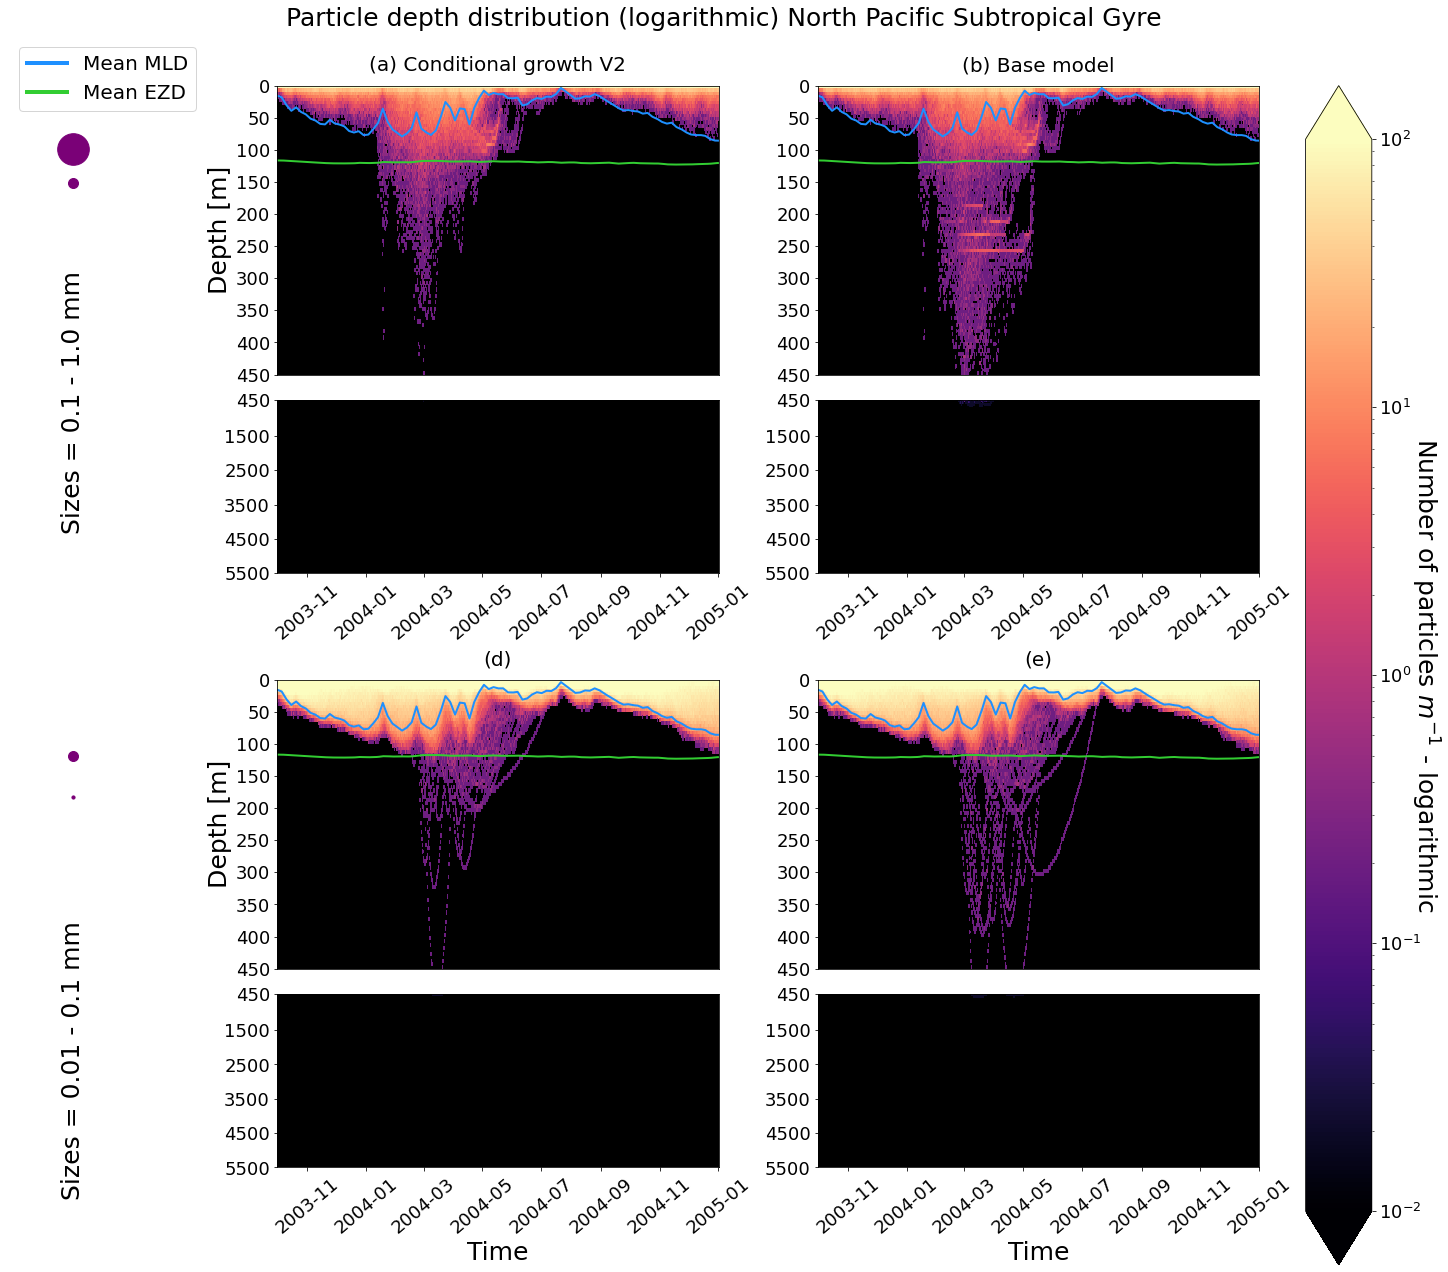

In [428]:
fig = plt.figure(figsize=(20,17),constrained_layout=True)
gs = gridspec.GridSpec(ncols=5, nrows=17, width_ratios=[0.3,1,1,1,0.15], figure=fig)
ax1 = fig.add_subplot(gs[:8, 0])
ax2 = fig.add_subplot(gs[8:, 0])

ax3 = fig.add_subplot(gs[:5, 1])
ax4 = fig.add_subplot(gs[5:8, 1]) 
ax5 = fig.add_subplot(gs[8:13, 1])
ax6 = fig.add_subplot(gs[13:16, 1])

ax7 = fig.add_subplot(gs[:5, 2])
ax8 = fig.add_subplot(gs[5:8, 2])
ax9 = fig.add_subplot(gs[8:13, 2])
ax10 = fig.add_subplot(gs[13:16, 2])

ax15 = fig.add_subplot(gs[:17, 4])
axes = [[ax1, ax2],[[ax3,ax4],[ax5,ax6]],[[ax7,ax8],[ax9,ax10]]]

for i, ax_r in enumerate(axes[1:]):   # column: region
    for c, ax_s in enumerate(ax_r):   # row: size
        for j, ax in enumerate(ax_s): # subfigure: depth
            ax.set_facecolor('k')
            ax.tick_params(axis='both', labelsize=18)#13
            pc = ax.pcolormesh(timebins,depthbins[sub_depths[j][0]:sub_depths[j][1]],depth_numbers[i,c,:,sub_depths[j][0]:sub_depths[j][1]-1].T, cmap=depth_cmap,norm=mcolors.LogNorm(vmin=1e-2, vmax=1e2))
            if j == 0:
                ax.plot(dslist[i]['time'][0,obs_ids[0]:obs_ids[1]], mldlist[i][obs_ids[0]:obs_ids[1]], linewidth=2, c='dodgerblue', label='Mean Mixed Layer Depth')
                ax.plot(dslist[i]['time'][0,obs_ids[0]:obs_ids[1]], ezlist[i][obs_ids[0]:obs_ids[1]], linewidth=2, c='limegreen', label='Mean Euphotic Depth')
                ax.tick_params(
                    axis='x',          # changes apply to the x-axis
                    which='both',      # both major and minor ticks are affected
                    bottom=False,      # ticks along the bottom edge are off
                    top=False,         # ticks along the top edge are off
                    labelbottom=False) # labels along the bottom edge are off
                
                n=c*3+i
                ax.set_ylim(depthbins[sub_depths[j][1]-1], depthbins[sub_depths[j][0]])
                ax.set_yticks(np.arange(450,-10,-50))
#                 ax.set_yticks(np.concatenate((np.arange(depthbins[sub_depths[j][1]-1], depthbins[sub_depths[j][0]],-50),[depthbins[sub_depths[j][0]]])))
                if c == 0:
                    ax.set_title('('+chr(ord('a')+n)+') '+ subs[condition[i]], fontsize=20, y=1.03)
                else:
                    ax.set_title('('+chr(ord('a')+n)+')', fontsize=20, y=1.03)
                if i == 0:
                    ax.set_ylabel('Depth [m]', fontsize=25)#14
            if j == 1:
                ax.set_ylim(depthbins[sub_depths[j][1]-1], depthbins[sub_depths[j][0]])
                ax.set_yticks([5500,4500,3500,2500,1500,450])
#                 ax.set_yticks((np.arange(depthbins[sub_depths[j][1]-1], depthbins[sub_depths[j][0]],-1000)))
                ax.tick_params(axis='x', rotation=40) #20)
                if c == 1:
                    ax.set_xlabel('Time', fontsize=25) #14)
 
        
cb = fig.colorbar(pc, cax=ax15, extend='both')
cb.set_label('Number of particles $m^{-1}$ - logarithmic', size=25, rotation=270, labelpad=20)
cb.ax.tick_params(labelsize=18) #13)

fig.suptitle('Particle depth distribution (logarithmic) '+regions[region], fontsize=25, y=1.03) #20) #January 2004 - January 2005 
#plt.subplots_adjust(top=0.92)
#fig.tight_layout(h_pad=1)
#fig.tight_layout()
for k, ds_r in enumerate(split_ds_adv):
    axes[0][k].scatter(0.5,0.87,s=sizebinedges[k]*1000000,color=r_pl_clist[0])
    axes[0][k].scatter(0.5,0.80,s=sizebinedges[k+1]*1000000,color=r_pl_clist[0])
    axes[0][k].set_ylim(0,1)
    axes[0][k].text(0.5,0.35,'Sizes = '+ str(ds_r[0].left*1000)+' - '+str(ds_r[0].right*1000)+' mm',rotation=90, fontsize=25, horizontalalignment='center',verticalalignment='center')
    axes[0][k].axis('off')
    
custom_lines = [Line2D([0], [0], color='dodgerblue', lw=4),
                Line2D([0], [0], color='limegreen', lw=4)]

ax1.legend(custom_lines, ["Mean MLD", "Mean EZD"], loc='upper right', fontsize=20, bbox_to_anchor=(1.5,1.1))
plt.savefig(datadir+'fig02_condition_v2_'+region)

In [429]:
zdiff = ds_1['z'].values - ds_0['z'].values

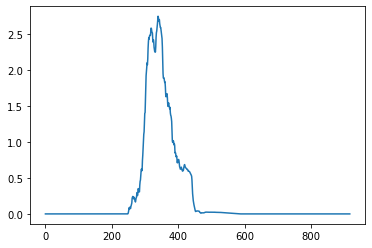

In [430]:
plt.plot(np.mean(zdiff,axis=0))

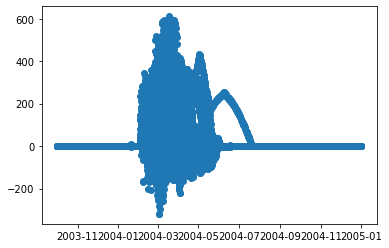

In [431]:
plt.scatter(ds_1['time'].values,zdiff)

In [432]:
ids_0=np.logical_and(ds_0['time']>np.datetime64('2004-01'),ds_0['time']<np.datetime64('2004-12'))
ids_1=np.logical_and(ds_1['time']>np.datetime64('2004-02'),ds_1['time']<np.datetime64('2004-04'))
# ids_1=np.logical_and(np.logical_and(ds_1['time']>np.datetime64('2004-02'),ds_1['time']<np.datetime64('2004-04')),ds_1['z']>180)
# ids_2=np.logical_and(ds_2['time']>np.datetime64('2004-01'),ds_2['time']<np.datetime64('2004-12'))

In [433]:
med_N2cell = 356.04e-09
wt_N = 14.007

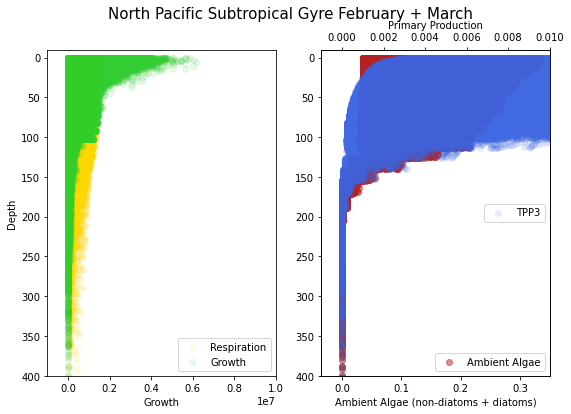

In [434]:
fig=plt.figure(figsize=(9,6))
gs = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)
ax = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = ax2.twiny()
f=10

fig.suptitle(regions[region]+' February + March', fontsize=15)
ax.scatter(ds_0['a_resp'].values[ids_0], ds_0['z'].values[ids_0], color='gold', alpha=0.1, label='Respiration')
ax.scatter(ds_0['a_growth'].values[ids_0], ds_0['z'].values[ids_0], color='limegreen', alpha=0.1, label='Growth')
# ax.scatter(ds_1['a_gr'].values[ids_1], ds_1['z'].values[ids_1], color='darkorange', alpha=0.1, label='Grazing')
# ax.scatter(ds_1['a_nl'].values[ids_1], ds_1['z'].values[ids_1], color='purple', alpha=0.1, label='Non-linear')

ax2.scatter(ds_0['aa'].values[ids_0]/wt_N*med_N2cell, ds_0['z'].values[ids_0], color='firebrick', alpha=0.5, label='Ambient Algae', zorder=0)
ax3.scatter(ds_0['tpp3'].values[ids_0], ds_0['z'].values[ids_0], color='royalblue', alpha=0.1, label='TPP3', zorder=1)

ax.set_ylabel('Depth')
ax.set_xlabel('Growth')
ax2.set_xlabel('Ambient Algae (non-diatoms + diatoms)')
ax3.set_xlabel('Primary Production')
ax3.set_xlim(-0.001, 0.01)
ax2.set_xlim(-0.035, 0.35)
ax2.set_ylim(400, -10)
ax.set_xlim(-1e6, 1e7)
ax.set_ylim(400, -10)
# ax.invert_yaxis()
ax.legend(loc='lower right')
ax3.legend(loc='center right')
ax2.legend(loc='lower right')
plt.savefig(datadir+'subsurface_'+region+condition[0])

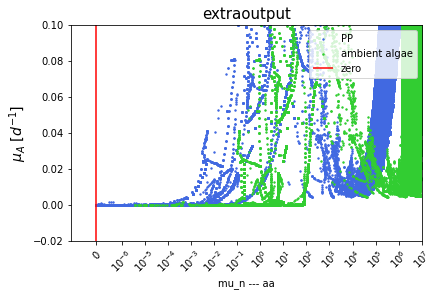

In [435]:
plt.figure(constrained_layout=True)
plt.title(condition[1], fontsize=15)
# plt.scatter(np.zeros(ds_1['tpp3'].values[ids_1].shape), ds_1['a_growth'].values[ids_1], color='red', s=2, label='actual zero')
plt.scatter(ds_1['mu_n'].values[ids_1], np.divide(ds_1['mu_n'].values[ids_1], ds_1['aa'].values[ids_1]), color='royalblue', s=2, label='PP')
plt.scatter(ds_1['aa'].values[ids_1], np.divide(ds_1['mu_n'].values[ids_1], ds_1['aa'].values[ids_1]), color='limegreen', s=2, label='ambient algae')
plt.vlines(0,-1e-1,1e0, color='red', label = 'zero')

plt.xlabel('mu_n --- aa')
plt.ylabel(r'$\mu_A$ [$d^{-1}$]', fontsize=14)
plt.xscale('symlog', linthresh=1e-6)

plt.xlim(-1e-6,1e7)
plt.ylim(-2e-2, 1e-1)
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.savefig(datadir+'growthrate_'+region+condition[1])

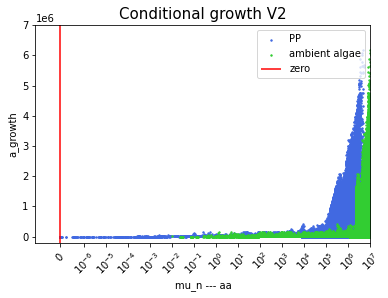

In [436]:
plt.title(subs[condition[0]], fontsize=15)
# plt.scatter(np.zeros(ds_1['tpp3'].values[ids_1].shape), ds_1['a_growth'].values[ids_1], color='red', s=2, label='actual zero')
plt.scatter(ds_0['mu_n'].values[ids_0], ds_0['a_growth'].values[ids_0], color='royalblue', s=2, label='PP')
plt.scatter(ds_0['aa'].values[ids_0], ds_0['a_growth'].values[ids_0], color='limegreen', s=2, label='ambient algae')
plt.vlines(0,-1e6,1e7, color='red', label = 'zero')

plt.xlabel('mu_n --- aa')
plt.ylabel('a_growth')
plt.xscale('symlog', linthresh=1e-6)

plt.xlim(-1e-6,1e7)
plt.ylim(-2e5, 7e6)
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.savefig(datadir+'year_growth_'+region+condition[0])

In [172]:
# diatoms_0 = ds_0['d_phy'].values[ds_0['d_phy']!=0.]
diatoms_1 = ds_1['aa'].values[ids_1] #ds_1['aa'].values[ds_1['aa']!=0.]
# diatoms_2 = ds_2['d_phy'].values[ds_2['d_phy']!=0.]

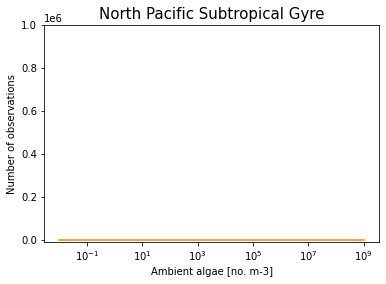

In [173]:
plt.hist(diatoms_1,bins=np.logspace(-1,9,100))
plt.title(regions[region[1]], fontsize=15)
plt.xlabel('Ambient algae [no. m-3]')
plt.ylabel('Number of observations')
plt.xscale('log')
# plt.xlim(1e-18, 1e1)
plt.ylim(-1e4, 1e6)
plt.plot(np.linspace(1e-2,1e9),np.zeros(50))
# plt.savefig(datadir+'aa_'+region[1])

In [457]:
ds_1

<xarray.Dataset>
Dimensions:     (traj: 10000, obs: 917)
Dimensions without coordinates: traj, obs
Data variables: (12/37)
    trajectory  (traj, obs) float64 ...
    time        (traj, obs) datetime64[ns] 2003-10-01 ... 2005-01-01
    lat         (traj, obs) float64 ...
    lon         (traj, obs) float64 ...
    z           (traj, obs) float64 0.6 6.093 2.38 10.68 ... 0.6 0.6 0.6 0.6
    w_adv       (traj, obs) float32 ...
    ...          ...
    wstar       (traj, obs) float32 ...
    aa          (traj, obs) float32 0.0 4.326e+06 ... 3.232e+06 3.24e+06
    mu_n        (traj, obs) float32 0.0 3.005e+05 ... 6.254e+05 6.324e+05
    rho_bf      (traj) float32 ...
    r_pl        (traj) float32 1e-05 1e-05 1e-05 1e-05 ... 0.001 0.001 0.001
    rho_pl      (traj) float32 ...
Attributes:
    feature_type:           trajectory
    Conventions:            CF-1.6/CF-1.7
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_version:        2.3.0
    parcels_mesh:           spherical

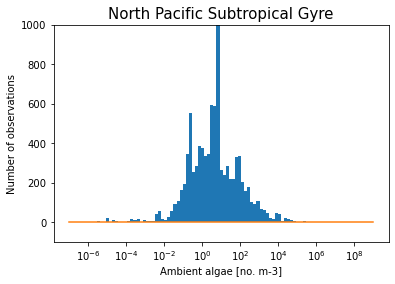

In [174]:
plt.hist(diatoms_1,bins=np.logspace(-7,9,100))
plt.title(regions[region[1]], fontsize=15)
plt.xlabel('Ambient algae [no. m-3]')
plt.ylabel('Number of observations')
plt.xscale('log')
# plt.xlim(1e-18, 1e-1)
plt.ylim(-1e2, 1e3)
plt.plot(np.linspace(1e-7,1e9),np.zeros(50))
# plt.savefig(datadir+'aa_'+region[1]+'_zoom')

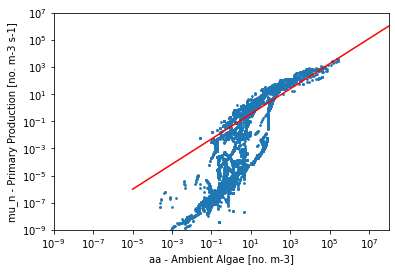

In [177]:
plt.scatter(ds_1['aa'].values[ids_1],ds_1['mu_n'].values[ids_1], s=3)
plt.xlabel('aa - Ambient Algae [no. m-3]')
plt.xscale('log')
plt.xlim(1e-9,1e8)
plt.ylabel('mu_n - Primary Production [no. m-3 s-1]')
plt.yscale('log')
plt.ylim(1e-9,1e7)
plt.plot(np.logspace(-5,8),0.1*np.logspace(-5,7),color='red')
# plt.savefig('mu_n_aa')

In [176]:
np.max(np.divide(ds_1['mu_n'],ds_1['aa']))

/Users/rfische1/opt/anaconda3/envs/py3_parcels/lib/python3.7/site-packages/xarray/core/computation.py:742: RuntimeWarning: invalid value encountered in true_divide
  result_data = func(*input_data)


<xarray.DataArray 'mu_n' ()>
array(1.1084815, dtype=float32)

In [438]:
depth_Lobelle = np.zeros((len(dslist),len(split_ds_adv),timeperiod,len(depthbins)-1))

In [440]:
for h in range(len(dslist)):
    print('h='+str(h))
    for k in range(len(split_ds_adv)):
        for i in range(timeperiod):
            for j in range(len(depthbins)-1):
                trajs0 = np.logical_and(split_dslist[h][k][1]['z'][:,obs_ids[0]+i].values>depthbins[j],split_dslist[h][k][1]['z'][:,obs_ids[0]+i].values<depthbins[j+1])
                vs0 = split_dslist[h][k][1]['vs_init'][:,obs_ids[0]+i].values[trajs0]
                w_m0 = split_dslist[h][k][1]['w_m'][:,obs_ids[0]+i].values[trajs0]
                w_adv0 = split_dslist[h][k][1]['w_adv'][:,obs_ids[0]+i].values[trajs0]
                w_m_b0 = split_dslist[h][k][1]['w_m_b'][:,obs_ids[0]+i].values[trajs0]
                depth_Lobelle[h,k,i,j] = np.mean(np.divide(np.abs(vs0),np.abs(w_m0+w_adv0+w_m_b0)))

h=0


/Users/rfische1/opt/anaconda3/envs/py3_parcels/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
/Users/rfische1/opt/anaconda3/envs/py3_parcels/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/rfische1/opt/anaconda3/envs/py3_parcels/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


h=1


In [445]:
Ratio_cmap = copy(plt.get_cmap('cmo.curl_r'))

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = mcolors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

Ratio_cmap = truncate_colormap(Ratio_cmap, 0.1, 0.9)

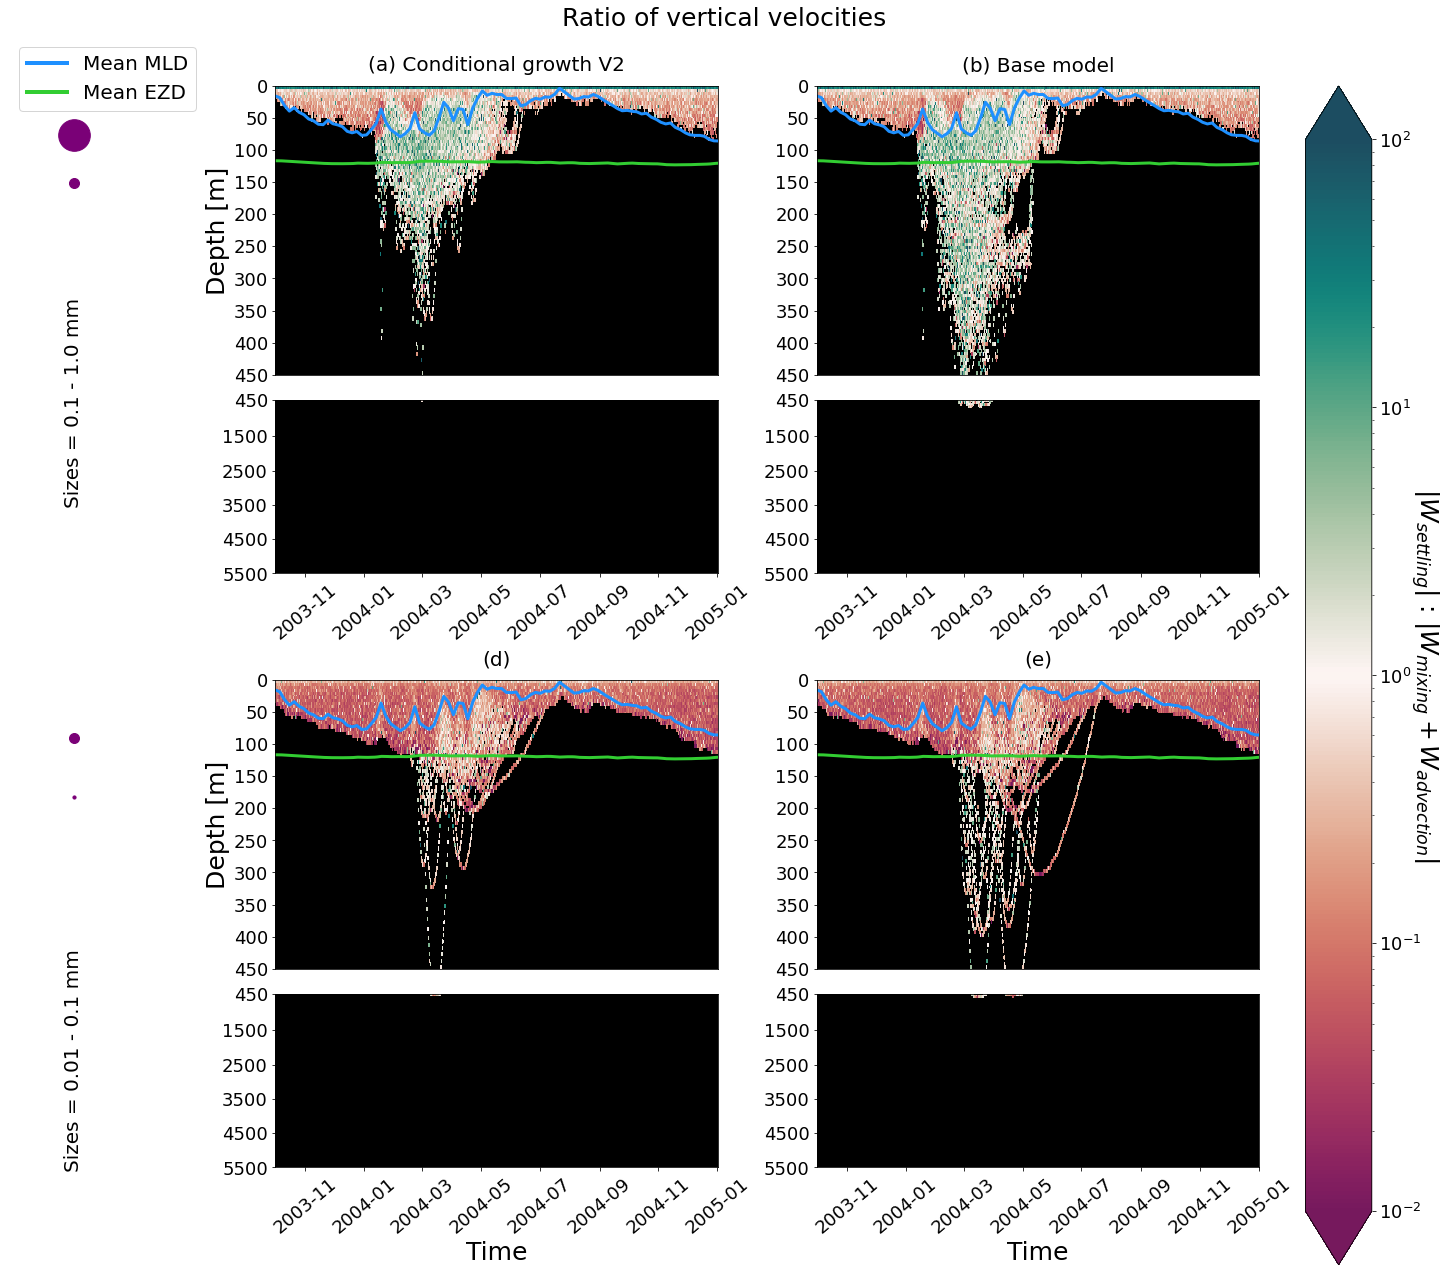

In [448]:
fig = plt.figure(figsize=(20,17),constrained_layout=True)
gs = gridspec.GridSpec(ncols=5, nrows=17, width_ratios=[0.3,1,1,1,0.15], figure=fig)
ax1 = fig.add_subplot(gs[:8, 0])
ax2 = fig.add_subplot(gs[8:, 0])

ax3 = fig.add_subplot(gs[:5, 1])
ax4 = fig.add_subplot(gs[5:8, 1]) 
ax5 = fig.add_subplot(gs[8:13, 1])
ax6 = fig.add_subplot(gs[13:16, 1])

ax7 = fig.add_subplot(gs[:5, 2])
ax8 = fig.add_subplot(gs[5:8, 2])
ax9 = fig.add_subplot(gs[8:13, 2])
ax10 = fig.add_subplot(gs[13:16, 2])

ax15 = fig.add_subplot(gs[:17, 4])
axes = [[ax1, ax2],[[ax3,ax4],[ax5,ax6]],[[ax7,ax8],[ax9,ax10]]]


for i, ax_r in enumerate(axes[1:]):
    for c, ax_s in enumerate(ax_r):
        for j, ax in enumerate(ax_s):
            ax.set_facecolor('k')
            pc = ax.pcolormesh(timebins,depthbins[sub_depths[j][0]:sub_depths[j][1]],depth_Lobelle[i,c,:,sub_depths[j][0]:sub_depths[j][1]-1].T, cmap=Ratio_cmap,norm=mcolors.LogNorm(vmin=1e-2, vmax=1e2))
            ax.tick_params(axis='both', labelsize=18)
            if j == 0:
                ax.plot(dslist[i]['time'][0,obs_ids[0]:obs_ids[1]], mldlist[i][obs_ids[0]:obs_ids[1]], linewidth=3, c='dodgerblue', label='Mean Mixed Layer Depth')
                ax.plot(dslist[i]['time'][0,obs_ids[0]:obs_ids[1]], ezlist[i][obs_ids[0]:obs_ids[1]], linewidth=3, c='limegreen', label='Mean Euphotic Depth')
                ax.tick_params(
                    axis='x',          # changes apply to the x-axis
                    which='both',      # both major and minor ticks are affected
                    bottom=False,      # ticks along the bottom edge are off
                    top=False,         # ticks along the top edge are off
                    labelbottom=False) # labels along the bottom edge are off
                
                n=c*3+i
                ax.set_ylim(depthbins[sub_depths[j][1]-1], depthbins[sub_depths[j][0]])
                ax.set_yticks(np.arange(450,-10,-50))
                if c == 0:
                    ax.set_title('('+chr(ord('a')+n)+') '+ subs[condition[i]], fontsize=20, y=1.03)
                else:
                    ax.set_title('('+chr(ord('a')+n)+')', fontsize=20, y=1.03)
                if i == 0:
                    ax.set_ylabel('Depth [m]', fontsize=25)#14
            if j == 1:
                ax.set_ylim(depthbins[sub_depths[j][1]-1], depthbins[sub_depths[j][0]])
                ax.set_yticks([5500,4500,3500,2500,1500,450])
                ax.tick_params(axis='x', rotation=40) #20)
                if c == 1:
                    ax.set_xlabel('Time', fontsize=25) #14)
 
        
cb = fig.colorbar(pc, cax=ax15, extend='both')
cb.set_label('$|W_{settling}|$ : $|W_{mixing}+W_{advection}|$', size=25, rotation=270, labelpad=20)
cb.ax.tick_params(labelsize=18)

fig.suptitle('Ratio of vertical velocities', fontsize=25, y=1.03)

for k, ds_r in enumerate(split_ds_adv):
    axes[0][k].scatter(0.5,0.90,s=sizebinedges[k]*1000000,color=r_pl_clist[0])
    axes[0][k].scatter(0.5,0.80,s=sizebinedges[k+1]*1000000,color=r_pl_clist[0])
    axes[0][k].set_ylim(0,1)
    axes[0][k].text(0.5,0.35,'Sizes = '+ str(ds_r[0].left*1000)+' - '+str(ds_r[0].right*1000)+' mm',rotation=90, fontsize=20, horizontalalignment='center',verticalalignment='center')
    axes[0][k].axis('off')
    
custom_lines = [Line2D([0], [0], color='dodgerblue', lw=4),
                Line2D([0], [0], color='limegreen', lw=4)]

ax1.legend(custom_lines, ["Mean MLD", "Mean EZD"], loc='upper right', fontsize=20, bbox_to_anchor=(1.5,1.1))
# plt.savefig(datadir+'fig_04_adv')

In [449]:
depth_Dominant = np.ones((len(dslist),len(split_ds_adv),timeperiod,len(depthbins)-1))*-1

In [450]:
for h in range(len(dslist)):
    print('h='+str(h))
    for k in range(len(split_ds_adv)):
        for i in range(timeperiod):
            for j in range(len(depthbins)-1):
                trajs0 = np.logical_and(split_dslist[h][k][1]['z'][:,obs_ids[0]+i].values>depthbins[j],split_dslist[h][k][1]['z'][:,obs_ids[0]+i].values<depthbins[j+1])
                growth = split_dslist[h][k][1]['a_growth'][:,obs_ids[0]+i].values[trajs0]
                coll = split_dslist[h][k][1]['a_coll'][:,obs_ids[0]+i].values[trajs0]
                grazing = split_dslist[h][k][1]['a_gr'][:,obs_ids[0]+i].values[trajs0]
                lin = split_dslist[h][k][1]['a_l'][:,obs_ids[0]+i].values[trajs0]
                nonlin = split_dslist[h][k][1]['a_nl'][:,obs_ids[0]+i].values[trajs0]
                terms = np.array([np.mean(growth),np.mean(coll),np.mean(grazing),np.mean(lin),np.mean(nonlin)])
                if np.nanmax(terms)>0:
                    depth_Dominant[h,k,i,j] = np.argmax(terms)

h=0


/Users/rfische1/opt/anaconda3/envs/py3_parcels/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/rfische1/opt/anaconda3/envs/py3_parcels/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/Users/rfische1/opt/anaconda3/envs/py3_parcels/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: All-NaN slice encountered
  del sys.path[0]


h=1


In [452]:
Dominant_clist = ['#ABEBC6','#BB8FCE', '#F5B7B1', '#FCF3CF', '#92acee'] 
Dominant_cmap = LinearSegmentedColormap.from_list('Dominant_cmap', Dominant_clist, N=5)
Dominant_cmap.set_under('k')

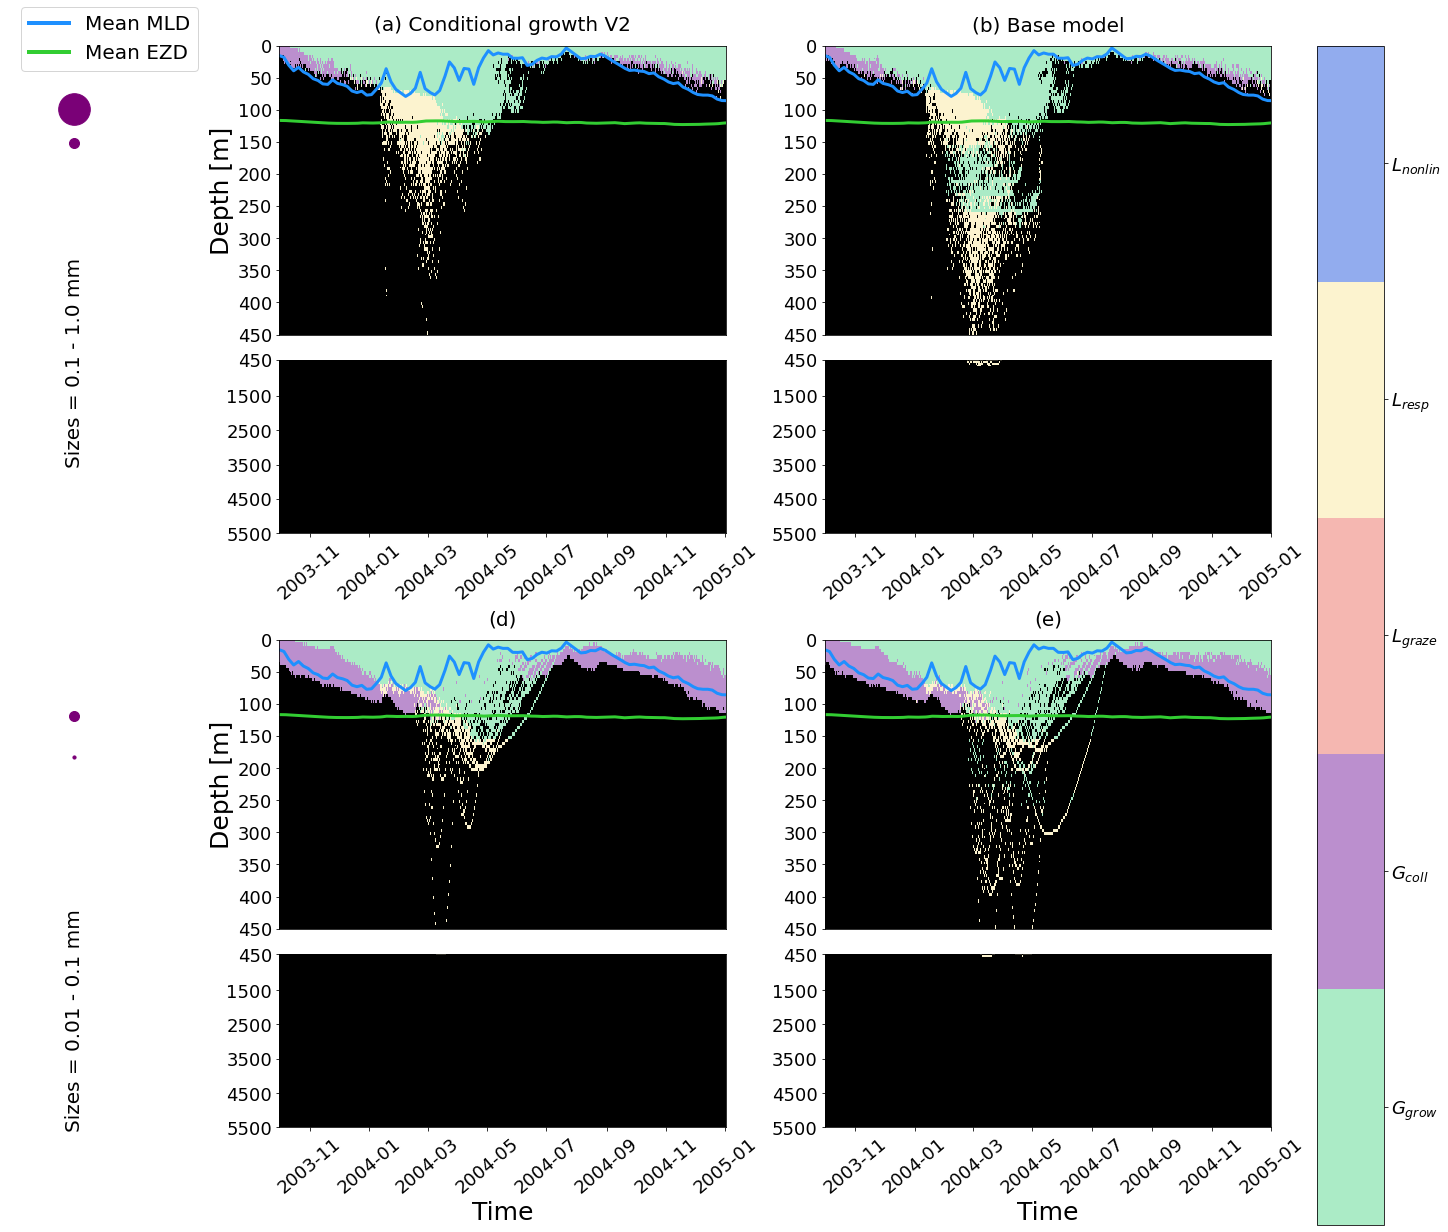

In [456]:
fig = plt.figure(figsize=(20,17),constrained_layout=True)
gs = gridspec.GridSpec(ncols=5, nrows=17, width_ratios=[0.3,1,1,1,0.15], figure=fig)
ax1 = fig.add_subplot(gs[:8, 0])
ax2 = fig.add_subplot(gs[8:, 0])

ax3 = fig.add_subplot(gs[:5, 1])
ax4 = fig.add_subplot(gs[5:8, 1]) 
ax5 = fig.add_subplot(gs[8:13, 1])
ax6 = fig.add_subplot(gs[13:16, 1])

ax7 = fig.add_subplot(gs[:5, 2])
ax8 = fig.add_subplot(gs[5:8, 2])
ax9 = fig.add_subplot(gs[8:13, 2])
ax10 = fig.add_subplot(gs[13:16, 2])

ax15 = fig.add_subplot(gs[:17, 4])
axes = [[ax1, ax2],[[ax3,ax4],[ax5,ax6]],[[ax7,ax8],[ax9,ax10]]]


for i, ax_r in enumerate(axes[1:]):
    for c, ax_s in enumerate(ax_r):
        for j, ax in enumerate(ax_s):
            ax.set_facecolor('k')
            pc = ax.pcolormesh(timebins,depthbins[sub_depths[j][0]:sub_depths[j][1]],depth_Dominant[i,c,:,sub_depths[j][0]:sub_depths[j][1]-1].T, cmap=Dominant_cmap,vmin=-0.5,vmax=4.5)#,norm=mcolors.LogNorm(vmin=1e-4, vmax=1e4))
            ax.tick_params(axis='both', labelsize=18)
            if j == 0:
                ax.plot(dslist[i]['time'][0,obs_ids[0]:obs_ids[1]], mldlist[i][obs_ids[0]:obs_ids[1]], linewidth=3, c='dodgerblue', label='Mean Mixed Layer Depth')
                ax.plot(dslist[i]['time'][0,obs_ids[0]:obs_ids[1]], ezlist[i][obs_ids[0]:obs_ids[1]], linewidth=3, c='limegreen', label='Mean Euphotic Depth')
                ax.tick_params(
                    axis='x',          # changes apply to the x-axis
                    which='both',      # both major and minor ticks are affected
                    bottom=False,      # ticks along the bottom edge are off
                    top=False,         # ticks along the top edge are off
                    labelbottom=False) # labels along the bottom edge are off
                
                n=c*3+i
                ax.set_ylim(depthbins[sub_depths[j][1]-1], depthbins[sub_depths[j][0]])
                ax.set_yticks(np.arange(450,-10,-50))
                if c == 0:
                    ax.set_title('('+chr(ord('a')+n)+') '+ subs[condition[i]], fontsize=20, y=1.03)
                else:
                    ax.set_title('('+chr(ord('a')+n)+')', fontsize=20, y=1.03)
                if i == 0:
                    ax.set_ylabel('Depth [m]', fontsize=25)#14
            if j == 1:
                ax.set_ylim(depthbins[sub_depths[j][1]-1], depthbins[sub_depths[j][0]])
                ax.set_yticks([5500,4500,3500,2500,1500,450])
                ax.tick_params(axis='x', rotation=40) #20)
                if c == 1:
                    ax.set_xlabel('Time', fontsize=25) #14)
        
cb = fig.colorbar(pc, cax=ax15, ticks=[0,1,2,3,4])
# cb.set_label('$Growth$ - $Collisions$', size=15)
cb.ax.set_yticklabels(['$G_{grow}$','$G_{coll}$','$L_{graze}$','$L_{resp}$','$L_{nonlin}$'], size=25)
cb.ax.tick_params(labelsize=18)

for k, ds_r in enumerate(split_ds_adv):
    axes[0][k].scatter(0.5,0.87,s=sizebinedges[k]*1000000,color=r_pl_clist[0])
    axes[0][k].scatter(0.5,0.80,s=sizebinedges[k+1]*1000000,color=r_pl_clist[0])
    axes[0][k].set_ylim(0,1)
    axes[0][k].text(0.5,0.35,'Sizes = '+ str(ds_r[0].left*1000)+' - '+str(ds_r[0].right*1000)+' mm',rotation=90, fontsize=20, horizontalalignment='center',verticalalignment='center')
    axes[0][k].axis('off')
    
custom_lines = [Line2D([0], [0], color='dodgerblue', lw=4),
                Line2D([0], [0], color='limegreen', lw=4)]

ax1.legend(custom_lines, ["Mean MLD", "Mean EZD"], loc='upper right', fontsize=20, bbox_to_anchor=(1.5,1.1))
# plt.savefig(datadir+'fig_05_condition')

(500.0, 0.0)

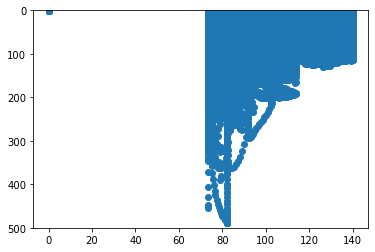

In [459]:
plt.scatter(ds_0['euphz'], ds_0['z'])
plt.ylim(500, 0)

### Create and save distibution data

In [307]:
ds_1

<xarray.Dataset>
Dimensions:     (traj: 10000, obs: 917)
Dimensions without coordinates: traj, obs
Data variables: (12/37)
    trajectory  (traj, obs) float64 ...
    time        (traj, obs) datetime64[ns] 2003-10-01 ... 2005-01-01
    lat         (traj, obs) float64 ...
    lon         (traj, obs) float64 ...
    z           (traj, obs) float64 0.6 6.093 2.38 10.68 ... 0.6 0.6 0.6 0.6
    w_adv       (traj, obs) float32 ...
    ...          ...
    wstar       (traj, obs) float32 ...
    aa          (traj, obs) float32 0.0 4.326e+06 ... 3.232e+06 3.24e+06
    mu_n        (traj, obs) float32 0.0 3.005e+05 ... 6.254e+05 6.324e+05
    rho_bf      (traj) float32 1.17e+03 1.17e+03 1.17e+03 ... 1.17e+03 1.17e+03
    r_pl        (traj) float32 1e-05 1e-05 1e-05 1e-05 ... 0.001 0.001 0.001
    rho_pl      (traj) float32 920.0 920.0 920.0 920.0 ... 920.0 920.0 920.0
Attributes:
    feature_type:           trajectory
    Conventions:            CF-1.6/CF-1.7
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_version:        2.3.0
    parcels_mesh:           spherical

In [322]:
r = np.repeat([ds_1['r_pl'].values],len(ds_1['obs']),axis=0).T

In [325]:
A = 4*np.pi*np.square(r)

In [327]:
ds_1['A'] = (('traj','obs'),4*np.pi*np.square(r))

In [329]:
depth_algae = np.zeros((2,timeperiod,len(depthbins)-1))
# depth_numbers = np.zeros((len(dslist),len(split_ds_2),timeperiod,len(depthbins)-1))

for i in range(timeperiod):
    if i%30 == 0:
        print(i)
    for j in range(len(depthbins)-1):
        ids = np.logical_and(ds_1['z'].isel(obs=obs_ids[0]+i)>depthbins[j],ds_1['z'].isel(obs=obs_ids[0]+i)<depthbins[j+1])
        
        aa = ds_1['aa'].isel(obs=obs_ids[0]+i).values[ids]
        a = ds_1['a'].isel(obs=obs_ids[0]+i).values[ids] # no. m^-2
        A = ds_1['A'].isel(obs=obs_ids[0]+i).values[ids] # m^2
        no = np.multiply(a,A) # no.
        
        depth_algae[0,i,j] = np.mean(aa)#/(depthbins[j+1]-depthbins[j])
        depth_algae[1,i,j] = np.sum(no)/(depthbins[j+1]-depthbins[j])

0
30
60
90
120
150
180
210


In [330]:
depth_algae = np.nan_to_num(depth_algae)

In [331]:
# plt.scatter(ds_1['time'], ds_1['z'], c=ds_1['aa'])
# plt.legend()
# plt.
# plt.savefig(datadir+'aa_scatter')

SyntaxError: invalid syntax (126567634.py, line 3)

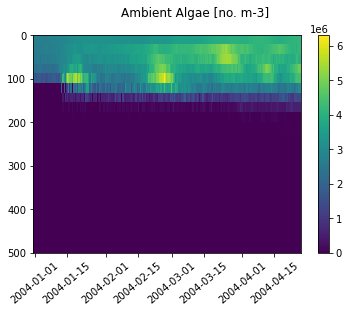

In [332]:
fig = plt.figure()
fig.suptitle('Ambient Algae [no. m-3]')
ax = plt.axes()
pc = ax.pcolormesh(timebins, depthbins, depth_algae[0].T)
ax.set_ylim(500, 0)
ax.tick_params(axis='x', rotation=40)
plt.colorbar(pc)

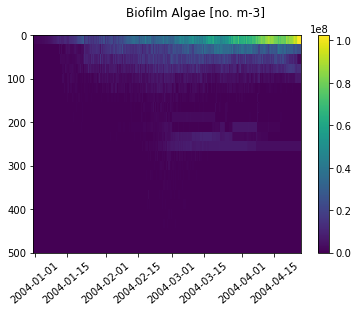

In [333]:
fig = plt.figure()
fig.suptitle('Biofilm Algae [no. m-3]')
ax = plt.axes()
pc = ax.pcolormesh(timebins, depthbins, depth_algae[1].T)
# ax.invert_yaxis()
ax.set_ylim(500, 0)
ax.tick_params(axis='x', rotation=40)
plt.colorbar(pc)